# Introduction




# Prepare for analysis

## Load packages

In [135]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [178]:
import pandas as pd
import numpy as np
import titanic_problem_set.baseline_modelling as bs_model
import titanic_problem_set.plot_util as plt_util
import titanic_problem_set.analysis_util as analysis
from titanic_problem_set.preliminary_inspection import find_missing_data, find_uniques, find_most_frequent, load_data

In [139]:
from pathlib import Path
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier

In [138]:

TRAIN_PATH = "data/train.csv"
TEST_PATH = "data/test.csv"

## Read the data

In [7]:
train_df = load_data(TRAIN_PATH)
test_df = load_data(TEST_PATH)

# Preliminary data inspection

## Quick glimpse of the data
TODO: Think if you can abstract away much here.

In [118]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [119]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [120]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [121]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [122]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [123]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


## Few statistics on the data

### Missing data

In [8]:
df_missing_train = find_missing_data(train_df)
df_missing_test = find_missing_data(test_df)

### Most frequent data

In [11]:
df_most_frequent_train = find_most_frequent(train_df)
df_most_frequent_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Total,891,891,891,891,891,714,891,891,891,891,204,889
Most frequent item,891,0,3,"Dooley, Mr. Patrick",male,24.0,0,0,347082,8.05,G6,S
Frequence,1,549,491,1,577,30,608,678,7,43,4,644
Percent from total,0.112,61.616,55.107,0.112,64.759,4.202,68.238,76.094,0.786,4.826,1.961,72.441


In [12]:
df_most_frequent_test = find_most_frequent(test_df)
df_most_frequent_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Total,418,418,418,418,332,418,418,418,417,91,418
Most frequent item,1309,3,"Peter, Master. Michael J",male,21.0,0,0,PC 17608,7.75,B57 B59 B63 B66,S
Frequence,1,218,1,266,17,283,324,5,21,3,270
Percent from total,0.239,52.153,0.239,63.636,5.12,67.703,77.512,1.196,5.036,3.297,64.593


### Unique values

In [15]:
df_train_unique = find_uniques(train_df)
df_train_unique

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Total,891,891,891,891,891,714,891,891,891,891,204,889
Uniques,891,2,3,891,2,88,7,7,681,248,147,3


In [18]:
df_test_unique = find_uniques(test_df)
df_test_unique

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Total,418,418,418,418,332,418,418,418,417,91,418
Uniques,418,3,418,2,79,7,8,363,169,76,3


# Exploratory data analysis

## Univariate analysis for all features


We show here two graphs in paralel:
* distribution of class values, split per Survived value
* comparison of class values, in train and test data


Let's first aggregate train and test data into one single dataframe, `all_df`.

In [140]:
all_df = analysis.concat_train_test(train_df, test_df)
all_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family Size,Age Interval,Fare Interval,Sex_Pclass,Family Type,Family Name,Title,Given Name,Maiden Name,set
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2.0,1.0,0.0,M_C3,Small,Braund,Mr.,Owen Harris,None,train
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2.0,2.0,3.0,F_C1,Small,Cumings,Mrs.,John Bradley,Florence Briggs Thayer,train
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1.0,1.0,1.0,F_C3,Single,Heikkinen,Miss.,Laina,None,train
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2.0,2.0,3.0,F_C1,Small,Futrelle,Mrs.,Jacques Heath,Lily May Peel,train
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1.0,2.0,1.0,M_C3,Single,Allen,Mr.,William Henry,None,train


In [26]:
all_df.isna().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
set               0
dtype: int64

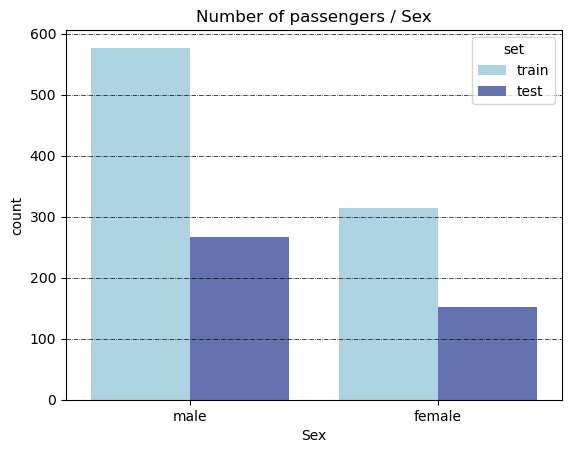

In [58]:

# Plot count pairs "Sex"
features = "Sex"
title = "Number of passengers"
plt_util.plot_count(all_df, features, "set", title)

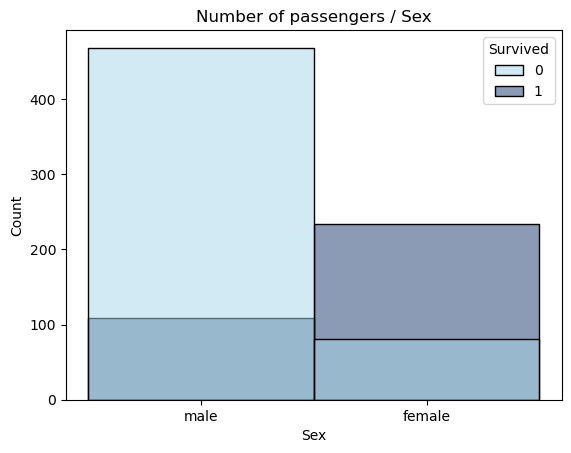

In [92]:
# Plot distribution pairs for "Sex" and hue as "Survived"
# color_list = ["#A5D7E8", "#576CBC", "#19376D", "#0b2447"]
color_list = ["#A5D7E8", "#19376D"]
feature = "Sex"
hue = "Survived"
plt_util.plot_distribution(
    df=train_df, 
    features=feature, 
    hue=hue ,
    title=title,
    color_list=color_list)

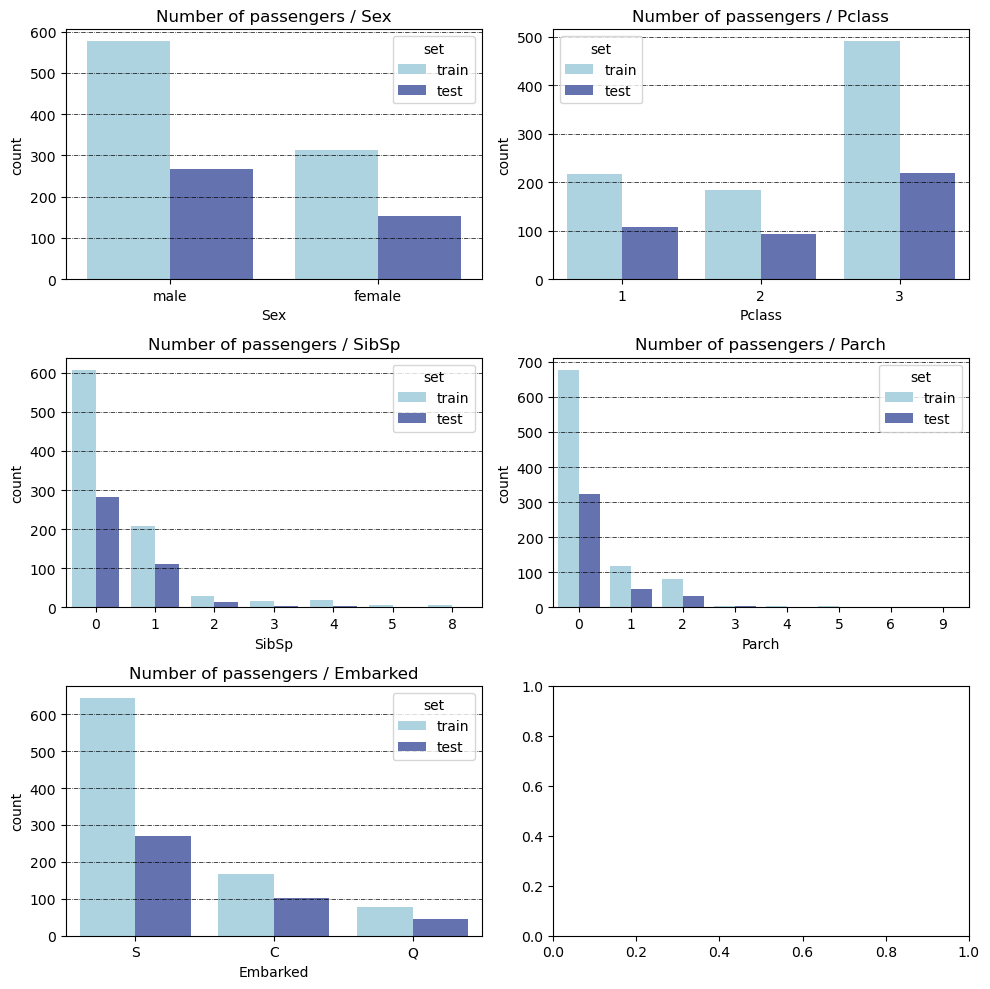

In [52]:
# Plot count pairs using all_df for the columns: Sex, Pclasss, SibSp, Parch, Embarked
features = ["Sex", "Pclass", "SibSp", "Parch", "Embarked"]
hue = "set"
plt_util.plot_count(all_df, features, hue, title)

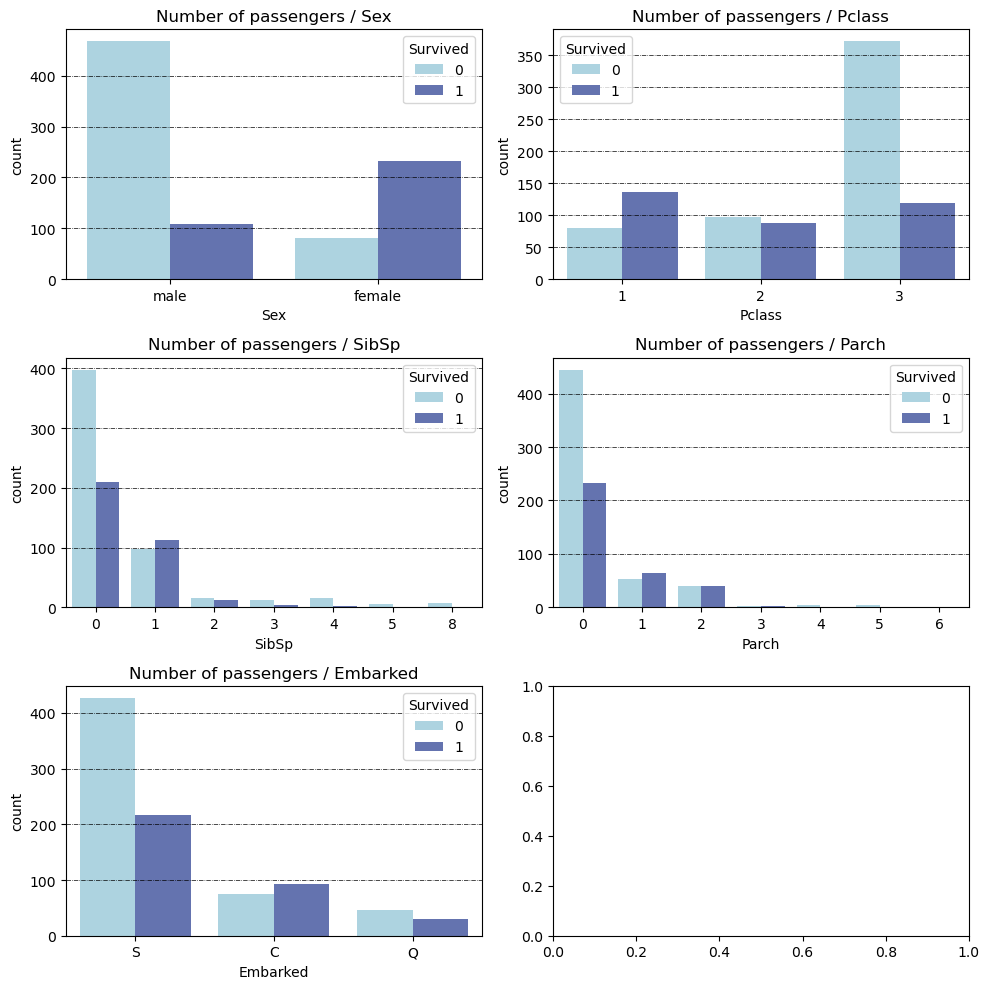

In [53]:
# Plot count pairs using all_df for the columns: Sex, Pclasss, SibSp, Parch, Embarked and use "Survived" as hue.
features = ["Sex", "Pclass", "SibSp", "Parch", "Embarked"]
hue = "Survived"
plt_util.plot_count(train_df, features, hue, title)

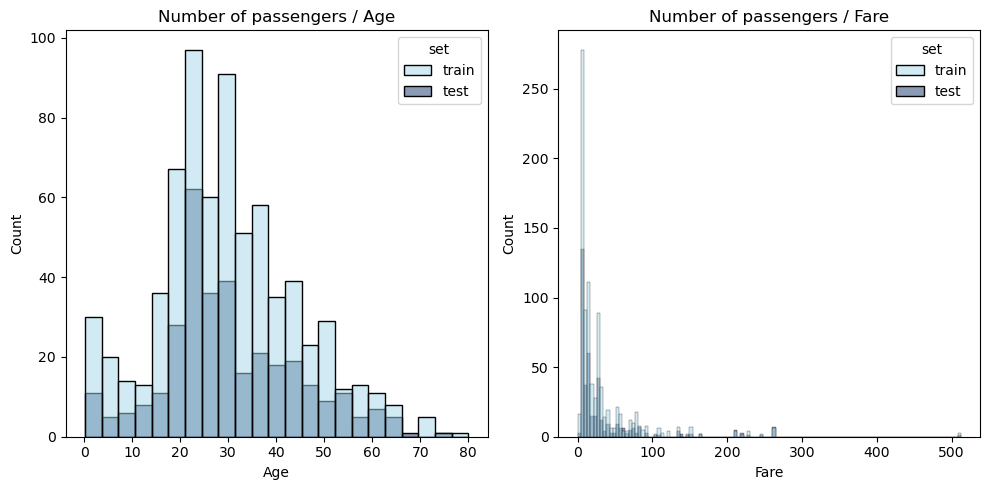

In [93]:
# Plot distribution pairs for Age and Fare
features = ['Age', 'Fare']
hue="set"
plt_util.plot_distribution(df=all_df, 
                        features=features, 
                        hue=hue,
                        title=title,
                        color_list=color_list)

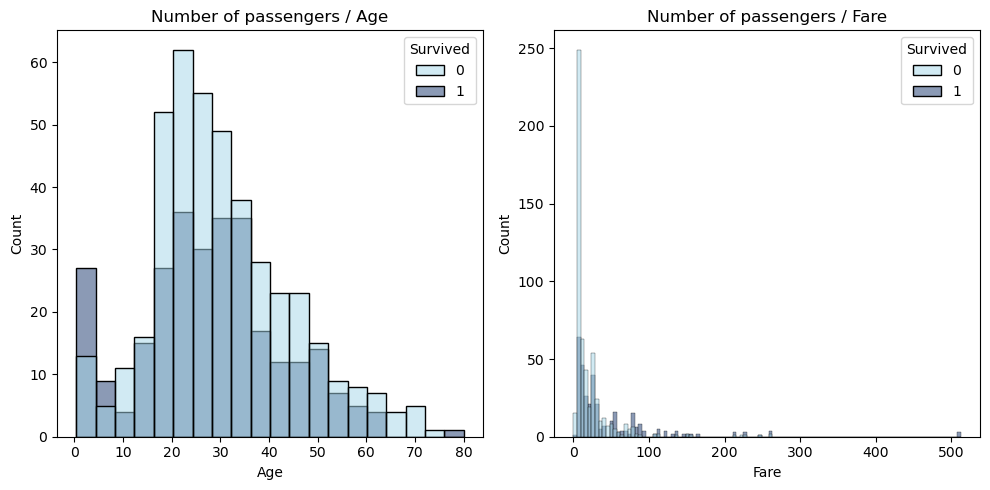

In [94]:
# Plot distribution pairs for Age and Fare using "Survived" as hue
features = ['Age', 'Fare']
hue="Survived"
plt_util.plot_distribution(df=train_df, 
                        features=features, 
                        hue=hue,
                        title=title,
                        color_list=color_list)
    

## Family size


Based on SibSp (sibilings or spouse) and Parch (parents or children), we set the Family Size field.

In [141]:
all_df = analysis.set_family_size(all_df)
all_df['Family Size'].unique()

array([ 2,  1,  5,  3,  7,  6,  4,  8, 11])

In [142]:
train_df = analysis.set_family_size(train_df)

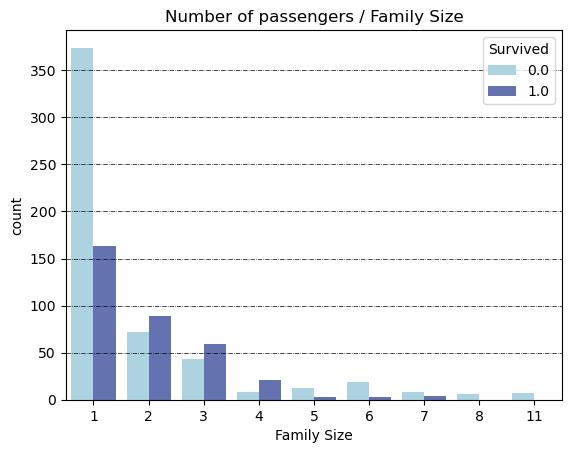

In [99]:
# Plot count pairs using all_df for the column "Family Size" and use "Survived" as hue.
plt_util.plot_count(df=all_df,
                    features="Family Size",
                    hue="Survived",
                    title=title)  

## Age interval

In [143]:
all_df = analysis.set_age_interval(all_df)

In [144]:
train_df = analysis.set_age_interval(train_df)

In [102]:
all_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,set,Family Size,Age Interval
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,train,2,1.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,train,2,2.0
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,train,1,1.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,train,2,2.0
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,train,1,2.0


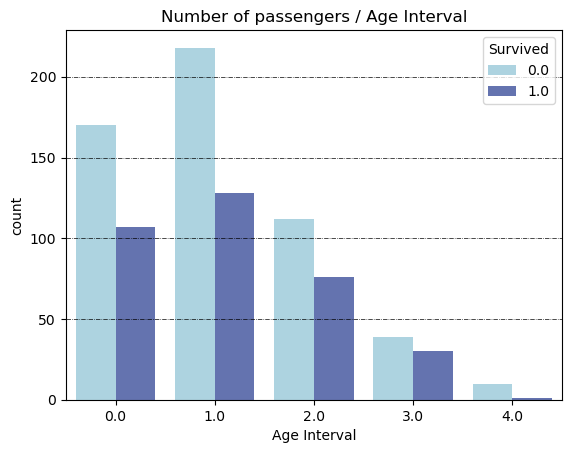

In [145]:
# Plot count pairs using all_df for the column "Age Interval" and use "Survived" as hue.
plt_util.plot_count(df=all_df,
                    features="Age Interval",
                    title=title,
                    hue="Survived")

## Fare interval

In [146]:
all_df = analysis.set_fare_interval(all_df)
all_df['Fare Interval'].unique()

array([0., 3., 1., 2.])

In [147]:
train_df = analysis.set_fare_interval(train_df)

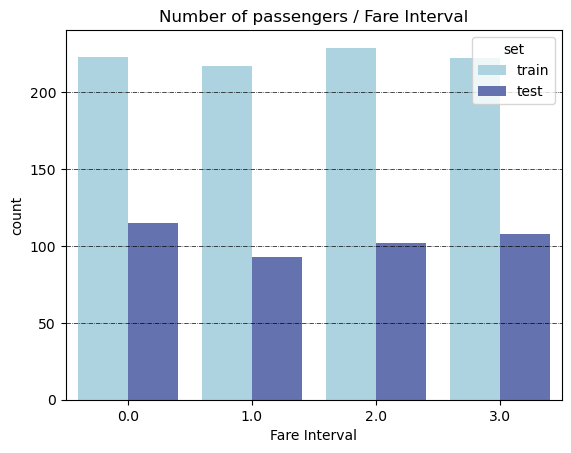

In [109]:
# Plot count pairs using all_df for the column "Fare Interval"
plt_util.plot_count(df=all_df,
                    features="Fare Interval",
                    title=title,
                    hue="set")

Let's create a composed feature: Pclass + Sex.

In [148]:
all_df = analysis.create_sex_Pclass(all_df)
train_df = analysis.create_sex_Pclass(train_df)

In [153]:
all_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family Size,Age Interval,Fare Interval,Sex_Pclass,Family Type,Family Name,Title,Given Name,Maiden Name,set
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,1.0,0.0,M_C3,Small,Braund,Mr.,Owen Harris,None,train
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,2.0,3.0,F_C1,Small,Cumings,Mrs.,John Bradley,Florence Briggs Thayer,train
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1.0,1.0,F_C3,Single,Heikkinen,Miss.,Laina,None,train
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,2.0,3.0,F_C1,Small,Futrelle,Mrs.,Jacques Heath,Lily May Peel,train
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,2.0,1.0,M_C3,Single,Allen,Mr.,William Henry,None,train


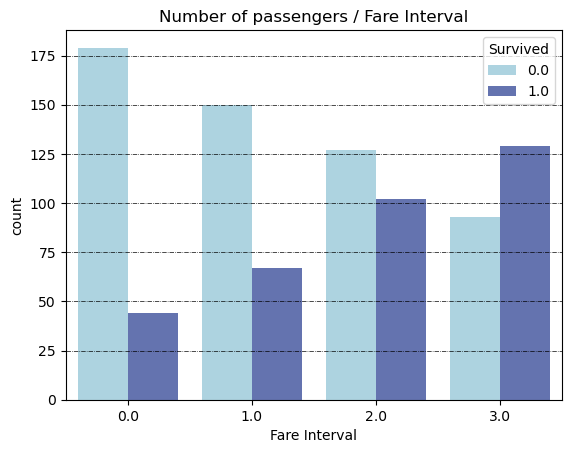

In [154]:
# Plot count pairs using all_df for the column "Fare Interval" and "Fare (grouped by survival)" with "Survived" as hue
plt_util.plot_count(df=all_df,
                    features="Fare Interval",
                    title=title,
                    hue="Survived")

## Process names


When we process names, we would like to extract the following information:

- Family name - this is the first word (or few first words, if a family name with multiple names), followed by a comma  
- Title - this follows just after the comma   
- Given name - this is the word or group of words following family name  
- Maiden name - for ladies, is given between parantheses  

We start with creating a function that parses the Name string and extract (if possible) these 4 elements


In [155]:
all_df = analysis.process_name(all_df)
train_df = analysis.process_name(train_df)

## Multivariate analysis


Let's look now to the interaction of multiple features.

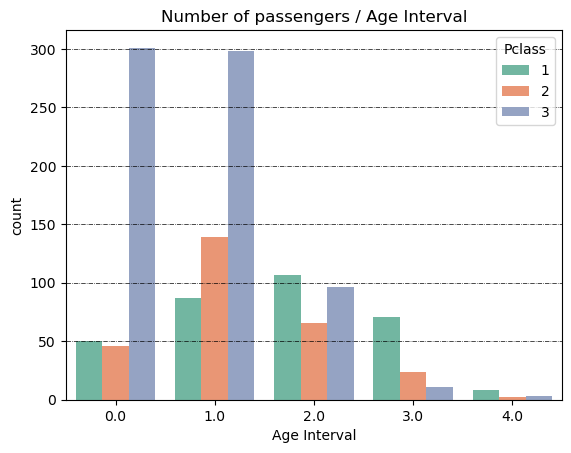

In [156]:
# TODO: Plot count pairs of "Age Interval" grouped by "Pclass"
plt_util.plot_count(df=all_df,
                    features="Age Interval",
                    title=title,
                    hue="Pclass",
                    colour_list="Set2")

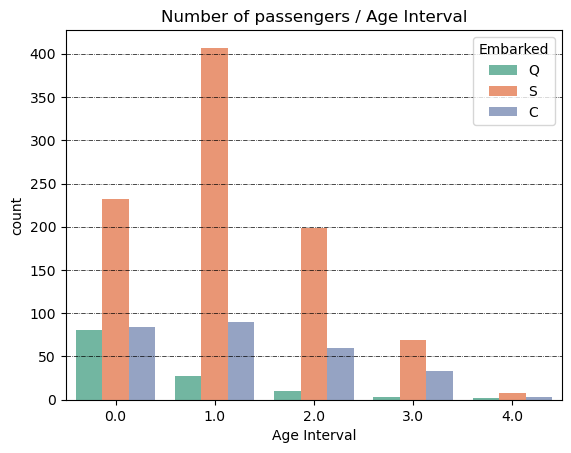

In [133]:
# TODO: Plot count pairs of "Age Interval" grouped by "Embarked"
plt_util.plot_count(df=all_df,
                    features="Age Interval",
                    title=title,
                    hue="Embarked",
                    colour_list="Set2")

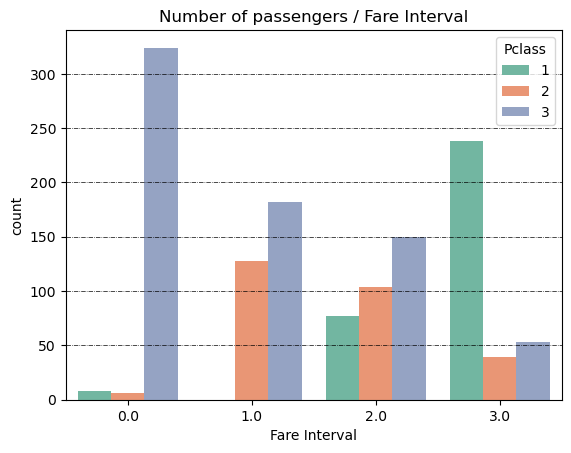

In [134]:
# TODO: Plot count pairs of "Pclass" grouped by "Fare Interval"
plt_util.plot_count(df=all_df,
            features="Fare Interval",
            title=title,
            hue="Pclass",
            colour_list="Set2")

### Few more engineered data 


Let's create two more engineered features:  
* Family size interval: Single, Small, Large  
* Aggregated titles: Mr, Mrs, Master, Miss, and Rare  

In [168]:
for dataset in [all_df, train_df]:
    dataset  = analysis.set_family_type(dataset)
   


/Users/lizzy/JavaPythonProjects/Mphil/d100_ds/titanic_problem_set/titanic_problem_set/analysis_util.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Single' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df['Family Size'] == 1, 'Family Type'] = 'Single'
/Users/lizzy/JavaPythonProjects/Mphil/d100_ds/titanic_problem_set/titanic_problem_set/analysis_util.py:137: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Single' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df['Family Size'] == 1, 'Family Type'] = 'Single'


In [169]:
for dataset in [all_df, train_df]:
    dataset = analysis.set_titles(dataset)

In [171]:
# TODO: turn into function
analysis.avg_survival_by_titles_and_sex(train_df)

,Titles,Sex,Survived
0,Master.,male,0.575000
1,Miss.,female,0.702703
2,Mr.,male,0.156673
3,Mrs.,female,0.793651
4,Rare,female,1.000000
5,Rare,male,0.250000


# Baseline model

## Feature engineering: Map categorical value to numerical values

In [172]:
for dataset in [all_df, train_df]:
    dataset = analysis.set_sex(dataset)

Create train-validation split.

In [173]:
VALID_SIZE = 0.2
train, valid = train_test_split(train_df, test_size=VALID_SIZE, random_state=42, shuffle=True)

Define predictor features and target feature.

In [174]:
predictors = ["Sex", "Pclass"]
target = 'Survived'

Define the training and validation data and labels.

In [179]:
train_X, train_Y, valid_X, valid_Y = bs_model.define_training_validation(train, valid, predictors, target)

Initialize the classifiction algorithm. Predict the validation data.

In [104]:
preds_tr, preds = bs_model.train_and_predict_rf(train_X=train_X, train_Y=train_Y, valid_X=valid_X)

# Evaluation

## Classification report for training data.

In [181]:
print(metrics.classification_report(train_Y, preds_tr, target_names=['Not Survived', 'Survived']))

              precision    recall  f1-score   support

Not Survived       0.75      0.99      0.86       444
    Survived       0.96      0.47      0.63       268

    accuracy                           0.79       712
   macro avg       0.86      0.73      0.74       712
weighted avg       0.83      0.79      0.77       712



Classification report for validation data.

In [182]:
print(metrics.classification_report(valid_Y, preds, target_names=['Not Survived', 'Survived']))

              precision    recall  f1-score   support

Not Survived       0.73      0.96      0.83       105
    Survived       0.90      0.49      0.63        74

    accuracy                           0.77       179
   macro avg       0.81      0.72      0.73       179
weighted avg       0.80      0.77      0.75       179

